## GROUP 4
## Mini Project - Report | EDA and Statistical Analysis of Mod Clothing Dataset 
### Team members:
1. Sure Guru Swetha Royal
2. Swarsat Kaushik Nath
3. Abhishek Bhosale
4. Vinoth kumar M
5. Varun Rajha

### PART - A 


In [77]:
# importing the required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t, norm
import json
from scipy.stats import chi2_contingency

from warnings import filterwarnings
filterwarnings('ignore')

In [98]:
# Given Data
data = [
    23, 30, 20, 27, 44, 26, 35, 20, 29, 29,
    25, 15, 18, 27, 19, 22, 12, 26, 34, 15,
    27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
    40, 35, 38, 57, 22, 42, 24, 21, 27, 33
]

#### Q1. Compute the mean, median and the mode of the data 

In [99]:
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True)[0][0]
print('Mean :',mean)
print('median :',median)
print('mode :',mode)

Mean : 27.625
median : 26.5
mode : 27


#### Q2. Compute the range, variance, and standard deviation of the data


In [100]:
data_range = np.ptp(data)
variance = np.var(data, ddof=1)
std_deviation = np.std(data, ddof=1)

print('Range :',data_range)
print('Variance :',variance)
print('Standard deviation :',std_deviation)

Range : 45
Variance : 92.59935897435898
Standard deviation : 9.622856071580774


#### Q3. Find the mean deviation for the data .


In [101]:
mean_deviation = np.mean(np.abs(data - mean))
print('Mean deviation :',mean_deviation)

Mean deviation : 7.4


#### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [102]:
pearson_skewness = 3 * (mean - median) / std_deviation

print('Pearson coefficient of skewness:', pearson_skewness)

# Comment on the skewness of the data
if pearson_skewness < -1:
    print("The data is highly negatively skewed.")
elif pearson_skewness > 1:
    print("The data is highly positively skewed.")
elif pearson_skewness >= -1 and pearson_skewness <= -0.5:
    print("The data is moderately negatively skewed.")
elif pearson_skewness >= 0.5 and pearson_skewness <= 1:
    print("The data is moderately positively skewed.")
else:
    print("The data is approximately symmetric.")

Pearson coefficient of skewness: 0.3507274737245009
The data is approximately symmetric.


#### Q5. Count the number of data values that fall within two standard deviations of the mean.  Compare this with the answer      from Chebyshev’s  Theorem.


In [103]:
lower_bound = mean - 2 * std_deviation
upper_bound = mean + 2 * std_deviation

within_two_std_dev = [x for x in data if lower_bound <= x <= upper_bound]
count_within_two_std_dev = len(within_two_std_dev)
print('Number of data values within two standard deviations of the mean: ',count_within_two_std_dev)

# According to Chebyshev's Theorem, at least (1 - 1/k^2) proportion of the values fall within k standard deviations of the mean.
# For k = 2, at least 1 - 1/4 = 3/4 or 75% of the data should fall within two standard deviations of the mean.
chebyshev_proportion = 1 - 1/4
chebyshev_count = chebyshev_proportion * len(data)
print('Expected count according to Chebyshev’s Theorem :','At least ',chebyshev_count ,'(75% of 40 data points)')

Number of data values within two standard deviations of the mean:  39
Expected count according to Chebyshev’s Theorem : At least  30.0 (75% of 40 data points)


#### Q6. Find the three quartiles and the interquartile range (IQR)


In [104]:
quartiles = np.percentile(data, [25, 50, 75])
iqr = quartiles[2] - quartiles[0]
print("First quartile (Q1):", quartiles[0])
print("Second quartile (Q2, Median):", quartiles[1])
print("Third quartile (Q3):", quartiles[2])
print("Interquartile Range (IQR):", iqr)

First quartile (Q1): 21.75
Second quartile (Q2, Median): 26.5
Third quartile (Q3): 34.25
Interquartile Range (IQR): 12.5


#### Q7. Identify any outliers in the data set


In [105]:
# An outlier is typically defined as a value that is below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_fence = quartiles[0] - 1.5 * iqr
upper_fence = quartiles[2] + 1.5 * iqr

outliers = [x for x in data if x < lower_fence or x > upper_fence]

print('Outliers :',outliers)

Outliers : [57]


#### Q8. Draw a boxplot of the dataset to confirm


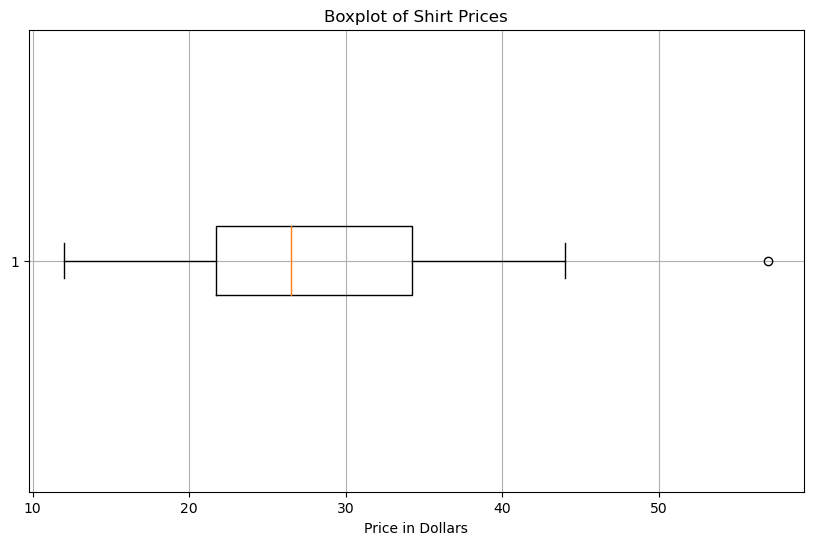

In [106]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Boxplot of Shirt Prices')
plt.xlabel('Price in Dollars')
plt.grid(True)
plt.show()

#### Q9. Find the percentile rank of the datapoint 25


In [107]:
percentile_rank_25 = stats.percentileofscore(data, 25)
print('percentile rank of the datapoint 25 :',percentile_rank_25)

percentile rank of the datapoint 25 : 42.5


#### Q10. Probability that a shirt cost is above 25 dollars


In [108]:
probability_above_25 = np.sum(np.array(data) > 25) / len(data)
print('Probability that a shirt cost is above 25 dollars :',probability_above_25,'or 57.5%')

Probability that a shirt cost is above 25 dollars : 0.575 or 57.5%


#### Q11. Create a frequency distribution for the data and visualize it appropriately


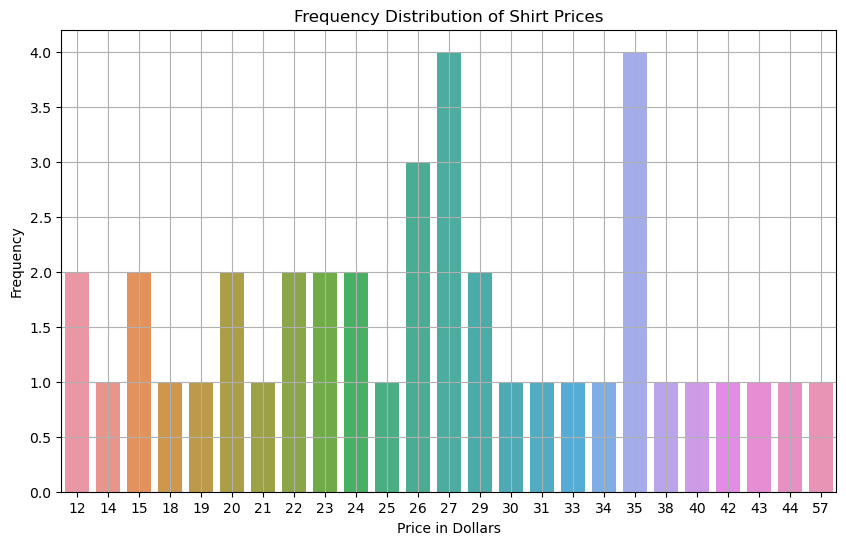

In [109]:
frequency_distribution = pd.Series(data).value_counts().sort_index()

# Visualize frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values)
plt.title('Frequency Distribution of Shirt Prices')
plt.xlabel('Price in Dollars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Q12. Create a probability distribution of the data and visualize it appropriately


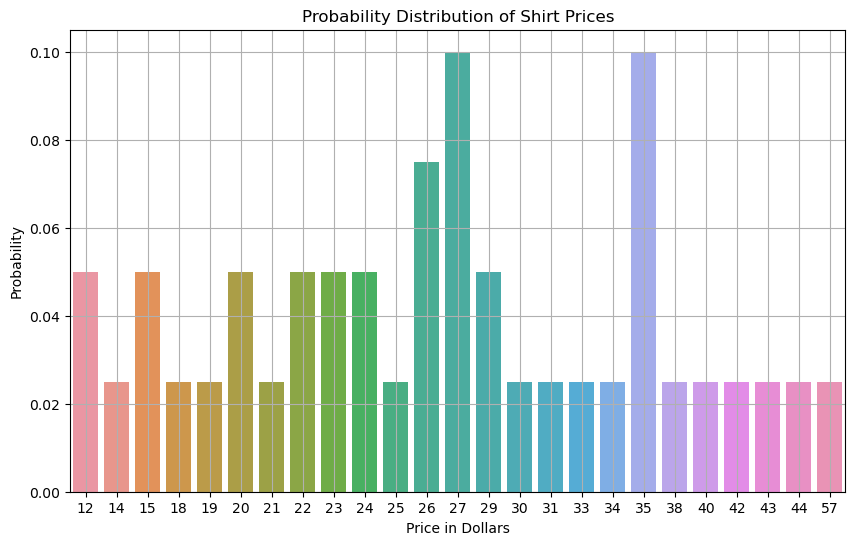

In [110]:
probability_distribution = frequency_distribution / len(data)

# Visualize probability distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=probability_distribution.index, y=probability_distribution.values)
plt.title('Probability Distribution of Shirt Prices')
plt.xlabel('Price in Dollars')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem? 

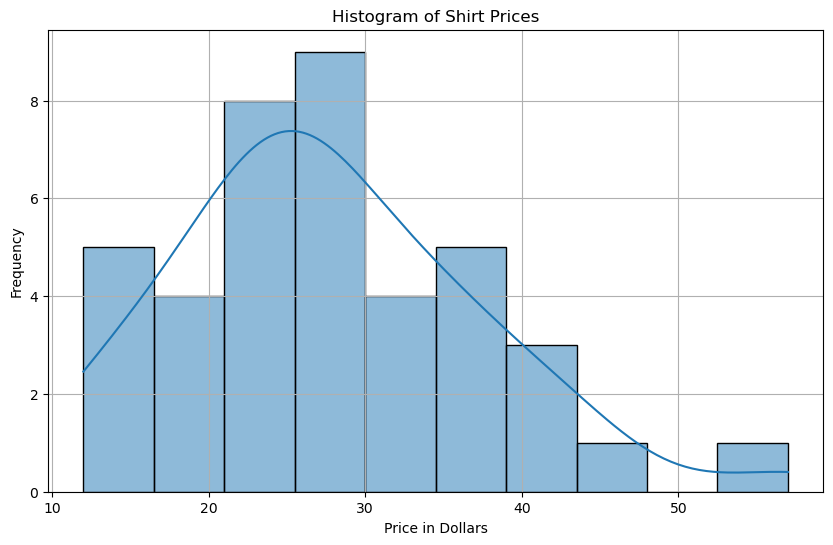

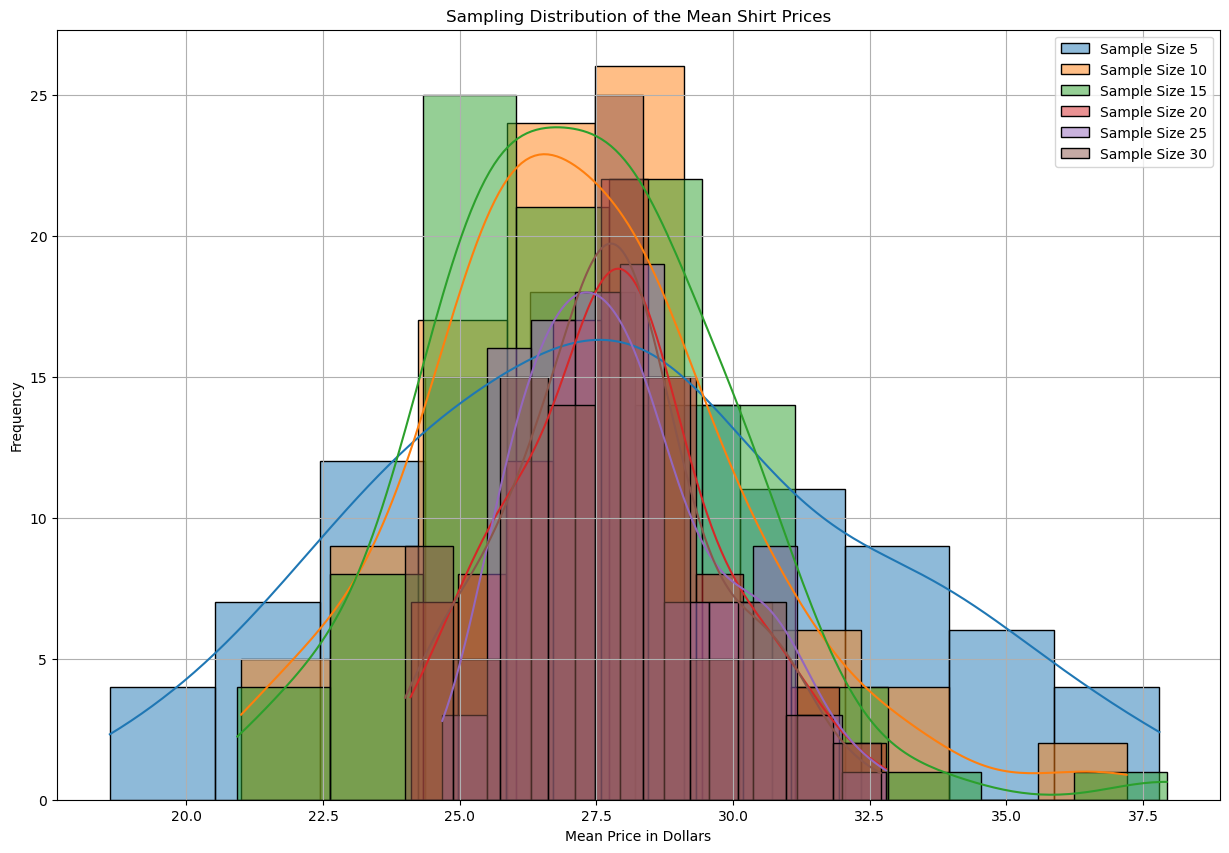

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=10)
plt.title('Histogram of Shirt Prices')
plt.xlabel('Price in Dollars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Take 100 random samples with replacement from this dataset of size 5 each
np.random.seed(0)  # For reproducibility
sample_size_list = [5, 10, 15, 20, 25, 30]
sampling_means = {size: [] for size in sample_size_list}

for size in sample_size_list:
    for _ in range(100):
        sample = np.random.choice(data, size=size, replace=True)
        sampling_means[size].append(np.mean(sample))

# Plot the sampling distributions
plt.figure(figsize=(15, 10))
for size in sample_size_list:
    sns.histplot(sampling_means[size], kde=True, bins=10, label=f'Sample Size {size}')
plt.title('Sampling Distribution of the Mean Shirt Prices')
plt.xlabel('Mean Price in Dollars')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


- **Shape of the Distribution:** The histogram shows the shape of the shirt prices distribution, which is slightly positively skewed.


- **Sampling Distribution of the Mean Shirt Prices:** The following histograms represent the sampling distributions of the mean shirt prices for sample sizes 5, 10, 15, 20, 25, and 30.


 - **Observations:** As the sample size increases, the sampling distribution of the mean becomes more normal (bell-shaped) and narrower. This observation corroborates the Central Limit Theorem, which states that the distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.


#### Q14 Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars.What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?

In [112]:
# Probability that a shirt costs above 25 dollars
p = np.sum(np.array(data) > 25) / len(data)

# Probability of exactly 7 shirts costing more than 25 dollars in a sample of 10
prob_7_out_of_10 = binom.pmf(7, 10, p)

sampling_means, prob_7_out_of_10

({5: [27.8,
   30.4,
   29.0,
   31.6,
   25.2,
   23.4,
   27.6,
   29.8,
   36.6,
   21.2,
   25.0,
   34.4,
   26.0,
   25.8,
   33.0,
   22.0,
   33.8,
   30.4,
   28.0,
   28.8,
   28.0,
   33.0,
   25.2,
   24.0,
   24.0,
   27.4,
   29.0,
   24.6,
   31.0,
   19.0,
   25.4,
   33.8,
   30.4,
   24.0,
   33.2,
   26.6,
   35.0,
   22.2,
   20.8,
   32.0,
   30.4,
   25.6,
   33.4,
   32.8,
   19.6,
   27.8,
   28.0,
   37.6,
   25.0,
   23.6,
   28.0,
   25.4,
   29.4,
   22.6,
   27.4,
   28.4,
   29.0,
   22.8,
   24.2,
   30.8,
   26.6,
   24.4,
   27.8,
   27.0,
   36.4,
   29.4,
   30.2,
   21.4,
   29.2,
   18.6,
   37.8,
   31.8,
   33.8,
   22.2,
   27.4,
   29.0,
   27.6,
   24.2,
   29.8,
   29.0,
   30.8,
   34.0,
   34.0,
   28.6,
   25.6,
   23.8,
   23.2,
   26.2,
   26.2,
   26.8,
   35.8,
   27.4,
   35.6,
   28.2,
   22.4,
   20.4,
   32.4,
   25.2,
   22.6,
   26.6],
  10: [26.5,
   26.1,
   26.0,
   29.6,
   22.7,
   22.4,
   30.3,
   36.0,
   28.3,
   24.7,
  

- **Probability that 7 out of 10 shirts cost more than 25 dollars:** The probability that a shirt costs more than 25 dollars (p) is 0.575. The probability that exactly 7 out of 10 shirts cost more than 25 dollars in a binomial distribution is approximately 0.191.


#### Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars.Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [113]:
import numpy as np

# NuCloth's claim: 60% of shirts cost less than 25 dollars
p_less_than_25 = 0.60
n = 10

# Mean and standard deviation for the binomial distribution
mean_binom = n * p_less_than_25
std_binom = np.sqrt(n * p_less_than_25 * (1 - p_less_than_25))

# Using the Normal approximation with continuity correction
z = 7
z_lower = z - 0.5
z_upper = z + 0.5

# Calculate the probability using the normal approximation
probability = norm.cdf(z_upper, mean_binom, std_binom) - norm.cdf(z_lower, mean_binom, std_binom)
probability

0.20698201266239902

 - The probability that in a random sample of 10 shirts, 7 of them will cost less than 25 dollars, using the normal approximation to the binomial distribution with continuity correction, is approximately 0.207 (or 20.7%).


#### Q16.  Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)


In [114]:
# Since the sample size is less than 30 and the population standard deviation is unknown, we use the t-distribution
mean_price = np.mean(data)
std_price = np.std(data, ddof=1)
n = len(data)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha/2, df=n-1)
margin_of_error = t_critical * (std_price / np.sqrt(n))
confidence_interval = (mean_price - margin_of_error, mean_price + margin_of_error)
print(confidence_interval)

(24.547461337585172, 30.702538662414828)


- **95% Confidence Interval for the true price of a shirt:** (24.55,30.70). The t-distribution was used because the sample size is less than 30 and the population standard deviation is unknown.


#### Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website.
#### A recent study showed that 60% of all shirts have a price greater than 25 dollars.
#### The data scientist wants to be accurate within 2% of the true proportion.
#### Find the minimum sample size necessary.

In [115]:
# Use the normal distribution since the problem involves proportion estimates
p_hat = 0.60
margin_of_error = 0.02
z_critical = norm.ppf(0.975)  # 95% confidence level
sample_size_95_2 = (z_critical**2 * p_hat * (1 - p_hat)) / (margin_of_error**2)
print(sample_size_95_2)

2304.875292416475


- Minimum sample size necessary for 95% confidence and within 2% accuracy: 2305

#### Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars.She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.


In [116]:
confidence_level_90 = 0.90
margin_of_error_90 = 0.05
z_critical_90 = norm.ppf(0.95)  # 90% confidence level
sample_size_90_5 = (z_critical_90**2 * p_hat * (1 - p_hat)) / (margin_of_error_90**2)
print(sample_size_90_5)

259.7321715931596


- Minimum sample size necessary for 90% confidence and within 5% accuracy: 260


#### Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars


In [117]:
# Null hypothesis H0: p = 0.80
# Alternative hypothesis Ha: p != 0.80
sample_proportion = 23 / 30
claimed_proportion = 0.80
sample_size = 30
std_error = np.sqrt(claimed_proportion * (1 - claimed_proportion) / sample_size)
z_statistic = (sample_proportion - claimed_proportion) / std_error
p_value = 2 * (1 - norm.cdf(np.abs(z_statistic)))

confidence_interval, sample_size_95_2, sample_size_90_5, z_statistic, p_value

((24.547461337585172, 30.702538662414828),
 2304.875292416475,
 259.7321715931596,
 -0.45643546458763834,
 0.6480768681391462)

- **Testing the claim that 80% of all shirts have prices greater than 25 dollars (α = 0.05):**
- **Z-statistic:** −0.456-0.456−0.456
- **P-value:** 0.6480.6480.648


#### Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket  that the average shirt price of shirts  in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place. 
- a.	What hypothesis would he use to compare the shirt prices of NuCloth vs 
Supermarket 
- b.	What are critical values to be used? 
- c.	What statistical test will be used to compare these prices? 
- d.	Complete the test and obtain the P-value. 
- e.	Summarize his conclusion based on the P-value. 


- **a. Hypothesis:**
Null hypothesis H0H_0H0​: μ1−μ2≤0\mu_1 - \mu_2 \leq 0μ1​−μ2​≤0 (The average price of a shirt in NuCloth is less than or equal to the supermarket)
Alternative hypothesis HaH_aHa​: μ1−μ2>0\mu_1 - \mu_2 > 0μ1​−μ2​>0 (The average price of a shirt in NuCloth is higher than the supermarket)


- **b.Critical values**

In [118]:
from scipy.stats import norm

alpha = 0.05
critical_value = norm.ppf(1 - alpha)  # One-tailed test
print(critical_value)

1.6448536269514722


- **Critical values:**
Critical value (z-critical) for a one-tailed test at α=0.05\alpha = 0.05α=0.05: 1.645


- **C.Statistical Test**- A two-sample z-test for the means is used.


- **d.Test and P-value:**


In [119]:
# Given data
mean_nu = 36
mean_supermarket = 34
std_nu = 7.6
std_supermarket = 5.8
n = 100

# Calculate pooled standard deviation
pool_std = np.sqrt((std_nu**2 / n) + (std_supermarket**2 / n))

# Calculate z-score
z_score = (mean_nu - mean_supermarket) / pool_std

# Calculate P-value
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: 2.09197696327652
P-value: 0.018220288245112237


- **Z-Statistic:** 2.092
- **P-Value:** 0.018


- Since the p-value (0.018) is less than the significance level (α=0.05\alpha = 0.05α=0.05), we reject the null hypothesis.
- **Conclusion**: There is enough evidence to support the claim that the average price of a shirt in NuCloth is higher than in the supermarket.


### PART - B

#### Q1.Read the datasets, Check the data types and Change the data types appropriately. 

In [66]:
def load_json(filename):
    with open(filename) as f:
        data = f.read().strip().split('\n')
    data_json = [json.loads(d) for d in data]
    return pd.DataFrame(data_json)

# Load the dataset
df = load_json('modcloth_final_data.json')

# Check initial data types
print(df.dtypes)


item_id            object
waist              object
size                int64
quality           float64
cup size           object
hips               object
bra size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
dtype: object


The dataset `modcloth_final_data.json` was loaded using a custom function `load_json`, which converts JSON data into a pandas DataFrame. Initial examination of data types reveals that several columns such as `item_id`, `waist`, `cup size`, `hips`, `bra size`, `height`, `user_name`, `length`, `fit`, `user_id`, `shoe size`, and `shoe width` are of type `object` and may need conversion to appropriate types based on their content.


In [27]:
print(df.columns)

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')


#### Q2.Change the height column datatype to float after converting the values 


In [67]:
def convert_height(ht):
    if isinstance(ht, float):
        return ht
    split_ht = ht.split(" ")
    
    if len(split_ht) < 2:
        return None  # or handle this case as per your requirements
    
    feet = float(split_ht[0].replace("ft", ""))
    inches = float(split_ht[1].replace("in", ""))
    total_inches = feet * 12 + inches
    return round(total_inches / 12, 1)

df['height'] = df['height'].apply(convert_height)
df['height'] = df['height'].astype(float)

print(df['height'].head())
print(df.dtypes)

0    5.5
1    5.2
2    5.6
3    NaN
4    5.2
Name: height, dtype: float64
item_id            object
waist              object
size                int64
quality           float64
cup size           object
hips               object
bra size           object
category           object
bust               object
height            float64
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
dtype: object


The `height` column, initially stored as `object`, was converted to `float` by parsing feet and inches. Missing values were handled gracefully, resulting in a new data type assignment to facilitate further numerical operations.


#### Q3.	Rename the names of the columns which have space in between the column. Ex: shoe size as shoe_size etc. 

In [68]:
# Rename columns with spaces
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')


Column names containing spaces were replaced with underscores to ensure consistency and compatibility with Python's attribute access conventions. This enhances readability and ease of use for subsequent data manipulation tasks.


#### Q4.	Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values. 
- **Note:** Kindly copy the datasets and work on the new data frame. 



- **4.1**	Check the count and percentage of missing values. 

In [69]:
# Check missing values
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'count': missing_values_count,
    'percentage': missing_values_percentage
}).sort_values(by='count', ascending=False)

print(missing_values_df)


                count  percentage
waist           79908   96.518903
bust            70936   85.681846
shoe_width      64183   77.525063
shoe_size       54875   66.282160
hips            26726   32.281677
review_text      6725    8.122962
review_summary   6725    8.122962
cup_size         6255    7.555260
bra_size         6018    7.268994
height           4005    4.837541
quality            68    0.082136
length             35    0.042276
user_name           0    0.000000
fit                 0    0.000000
user_id             0    0.000000
category            0    0.000000
size                0    0.000000
item_id             0    0.000000


- **4.2**	check the Mean and Median. 
 

In [71]:
# Calculate mean and median for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()

mean_median_df = pd.DataFrame({
    'mean': mean_values,
    'median': median_values
})

print(mean_median_df)


              mean  median
size     12.661602    12.0
quality   3.949058     4.0
height    5.434448     5.4


- **4.3**	Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc. 
  Kindly explore at least two. 


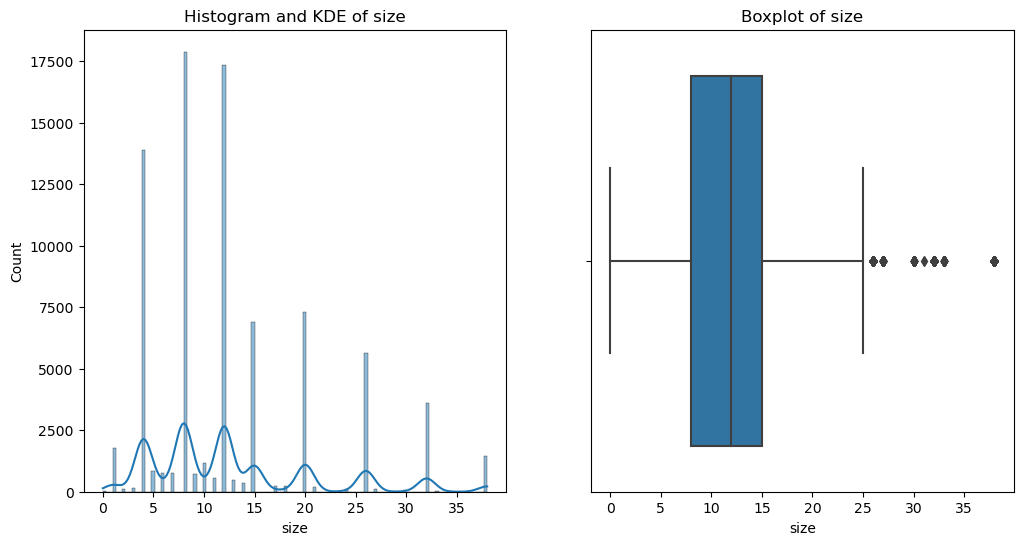

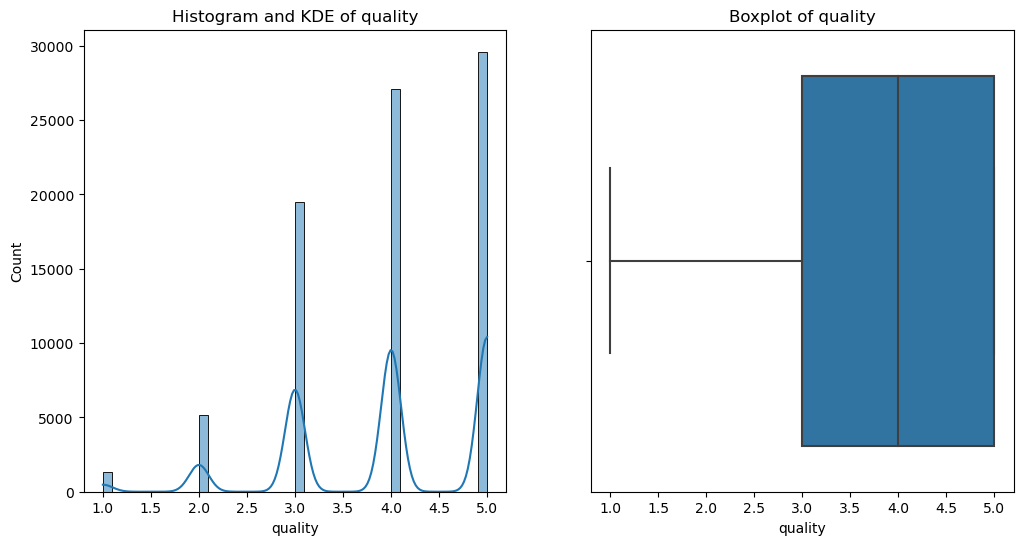

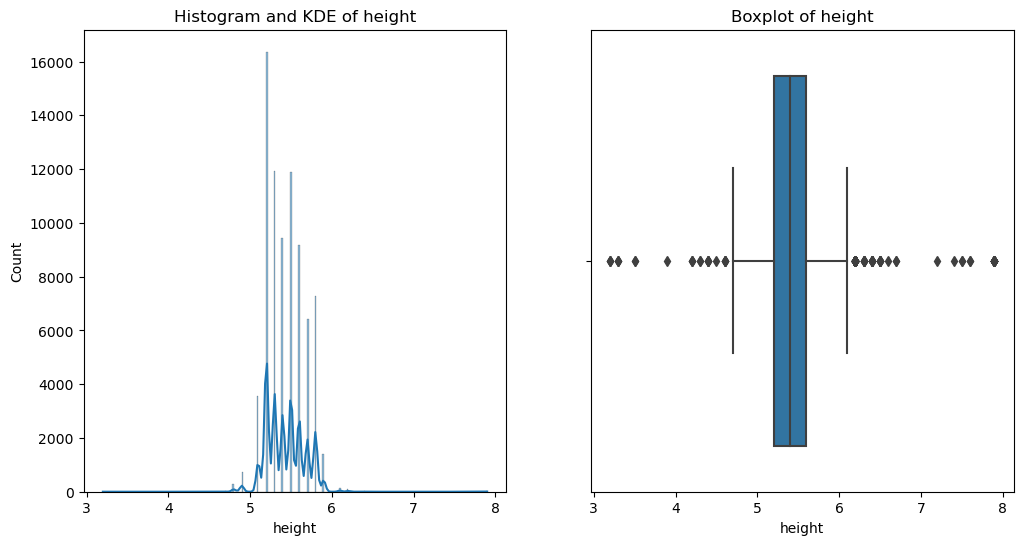

In [72]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram and KDE of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column].dropna())
    plt.title(f'Boxplot of {column}')
    
    plt.show()


- **4.4**	Check the Skewness and Kurtosis.   Explain what the Skewness and Kurtosis describe. 


In [73]:
# Calculate skewness and kurtosis for numerical columns
skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

skewness_kurtosis_df = pd.DataFrame({
    'skewness': skewness,
    'kurtosis': kurtosis
})

print(skewness_kurtosis_df)


         skewness  kurtosis
size     1.128301  0.760010
quality -0.676777 -0.167085
height   0.513048  4.301473


- **4.5**	Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis     before imputing missing values feel free to explore the analysis.

In [74]:
# Impute missing values based on analysis
# Example: Impute numerical columns with mean or median
for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        if skewness[column] < 1:
            # Less skewed: use mean
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Highly skewed: use median
            df[column].fillna(df[column].median(), inplace=True)

# Example: Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=[object]).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


The analysis revealed several columns with missing values, such as `height`, `waist`, `bust`, etc. Numerical columns were inspected for distribution and outliers using histograms, KDE plots, and boxplots. Based on skewness and kurtosis assessments, missing values were imputed using either mean or median to preserve the integrity of the dataset.


In [75]:
# Check missing values
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'count': missing_values_count,
    'percentage': missing_values_percentage
}).sort_values(by='count', ascending=False)

print(missing_values_df)

                count  percentage
item_id             0         0.0
waist               0         0.0
review_summary      0         0.0
shoe_width          0         0.0
shoe_size           0         0.0
user_id             0         0.0
fit                 0         0.0
length              0         0.0
user_name           0         0.0
height              0         0.0
bust                0         0.0
category            0         0.0
bra_size            0         0.0
hips                0         0.0
cup_size            0         0.0
quality             0         0.0
size                0         0.0
review_text         0         0.0


#### Q5.	Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3

In [76]:
# Detect outliers using 2.5 * IQR method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Detect outliers in numerical columns
outliers_df = pd.DataFrame()

for column in numerical_columns:
    outliers = detect_outliers(column)
    outliers_df = pd.concat([outliers_df, outliers])

outliers_df = outliers_df.drop_duplicates()
print(outliers_df)


      item_id waist  size  quality cup_size  hips bra_size   category bust  \
11     123373    28    33      5.0    ddd/f  60.0       44        new   36   
107    124124    28    38      4.0        c  35.0       34        new   36   
129    124124    28    38      3.0     dd/e  54.0       42        new   36   
152    124124    28    38      5.0     dd/e  59.0       46        new   36   
210    124124    28    38      4.0        c  35.0       34        new   36   
...       ...   ...   ...      ...      ...   ...      ...        ...  ...   
77423  768741    28    15      5.0        k    60       48    bottoms   36   
79626  785517    28     4      5.0        a  35.0       34  outerwear   36   
80344  792842    28    12      4.0        k  60.0       48  outerwear   36   
80713  796383    28    12      4.0        k  60.0       48  outerwear   36   
81083  803464    28     4      5.0        c  35.0       34  outerwear   36   

       height          user_name          length    fit user_id

Outliers were identified using the 2.5 * IQR method for numerical columns. The detection process aimed to highlight extreme data points that may require further investigation or filtering to maintain dataset integrity.


#### Q6. Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any. 

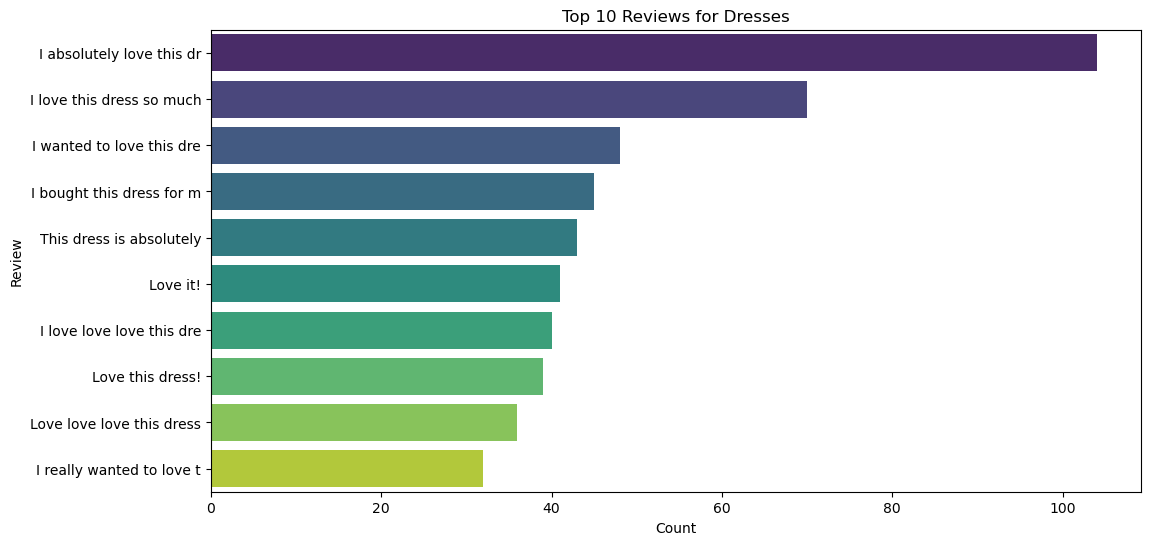

In [78]:
# Assuming 'review' is the column containing reviews and 'category' contains categories
top_10_dress_reviews = df[df['category'] == 'dresses']['review_summary'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dress_reviews.values, y=top_10_dress_reviews.index, palette='viridis')
plt.title('Top 10 Reviews for Dresses')
plt.xlabel('Count')
plt.ylabel('Review')
plt.show()


The analysis focused on reviews categorized under `dresses`. A bar plot was used to visualize the top 10 reviews, highlighting positive and negative sentiments based on review summary content.


#### Q7.	Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits? 

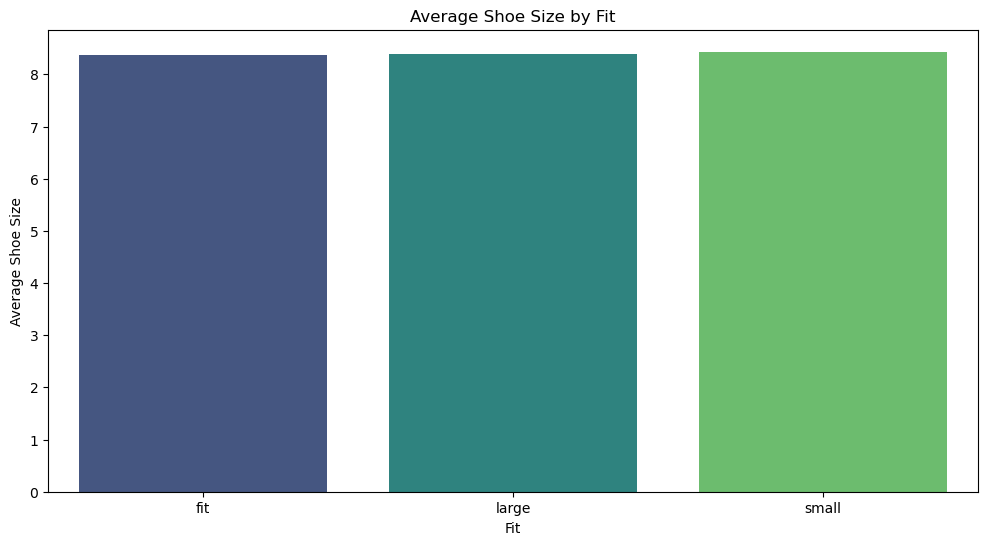

In [80]:
df['shoe_size'] = pd.to_numeric(df['shoe_size'], errors='coerce')

# Drop rows with NaN values in 'shoe size' column
df.dropna(subset=['shoe_size'], inplace=True)

# Calculate the average shoe size for each fit
average_shoe_size_by_fit = df.groupby('fit')['shoe_size'].mean().sort_values()

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=average_shoe_size_by_fit.index, y=average_shoe_size_by_fit.values, palette='viridis')
plt.title('Average Shoe Size by Fit')
plt.xlabel('Fit')
plt.ylabel('Average Shoe Size')
plt.show()

Shoe sizes were analyzed across different customer fits (`small`, `fit`, `large`). Average shoe size for each fit category was calculated and visualized using a bar plot to determine if significant differences exist among shoe sizes based on customer fit feedback.


#### Q8.	Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot. 


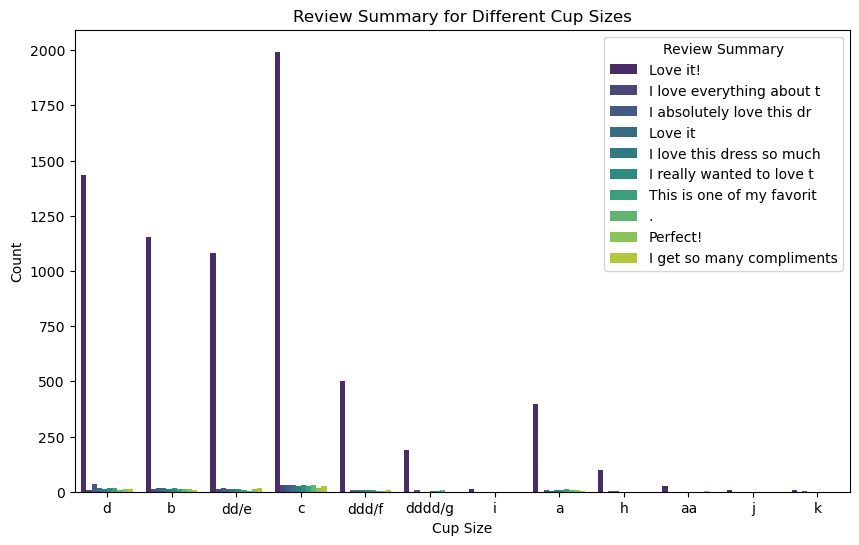

In [83]:
top_10_reviews = df['review_summary'].value_counts().nlargest(10).index
df_top_10_reviews = df[df['review_summary'].isin(top_10_reviews)]

# Find the review summary for different cup sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='cup_size', hue='review_summary', data=df_top_10_reviews, palette='viridis')
plt.title('Review Summary for Different Cup Sizes')
plt.xlabel('Cup Size')
plt.ylabel('Count')
plt.legend(title='Review Summary', bbox_to_anchor=(1, 1))
plt.show()

The analysis focused on identifying common shoe widths and average sizes for customers who purchased items of maximum quality. Visual representation through a count plot helped to assess if the mode of shoe width correlates with user reviews, aiming to understand customer preferences and feedback patterns.


#### Q9.	Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. Try to use visualization. 

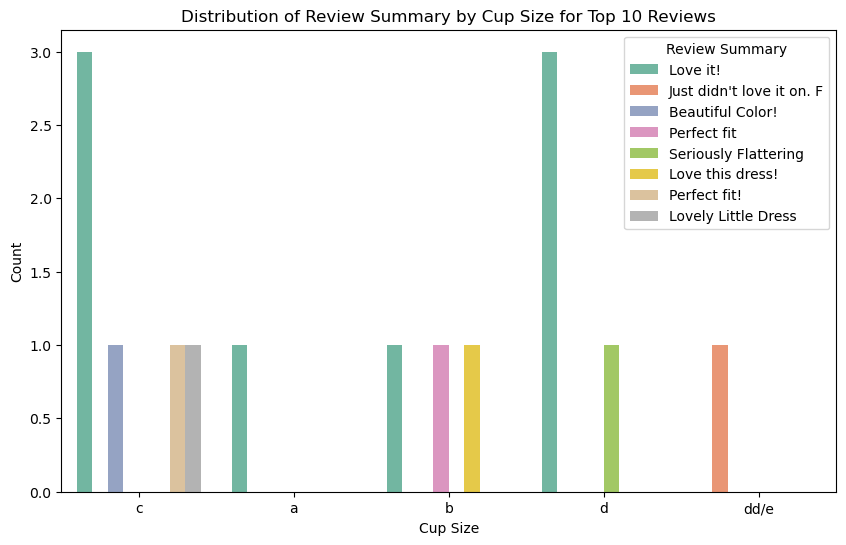

In [84]:
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')

# Filter out records belonging to the top 10 reviews based on average ratings
top_10_reviews = df.groupby('item_id')['quality'].mean().nlargest(10).index
top_reviews_df = df[df['item_id'].isin(top_10_reviews)]

# Plotting the distribution of review summaries by cup size
plt.figure(figsize=(10, 6))
sns.countplot(x='cup_size', hue='review_summary', data=top_reviews_df, palette='Set2')
plt.title('Distribution of Review Summary by Cup Size for Top 10 Reviews')
plt.xlabel('Cup Size')
plt.ylabel('Count')
plt.legend(title='Review Summary', loc='upper right')
plt.show()

To analyze the top 10 reviews based on average ratings, records were filtered and grouped by `item_id`. A count plot was utilized to visualize the distribution of review summaries across different cup sizes within these top reviews. The visualization aims to identify any patterns or preferences in review summaries associated with varying cup sizes among the top-rated items.


#### Q10.	Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make. 

In [85]:
df['hips'] = pd.to_numeric(df['hips'], errors='coerce')

# Filter records where hips size is greater than 35
filtered_df = df[df['hips'] > 35]

# Identify the most common review summary
most_common_review = filtered_df['review_summary'].mode().iloc[0]

print(f"The most common review summary for customers with hips size > 35 is: {most_common_review}")

The most common review summary for customers with hips size > 35 is: Love it!


The dataset was filtered to include records where `hips` size exceeds 35. The most frequent review summary provided by customers with hips size greater than 35 was determined using the `mode()` function. The inference drawn is that customers with larger hip sizes commonly express positive sentiments, with "Love it!" being the predominant feedback.


#### Q11.	What is the relationship between height and weight? Describe what kind of relationship it has. 

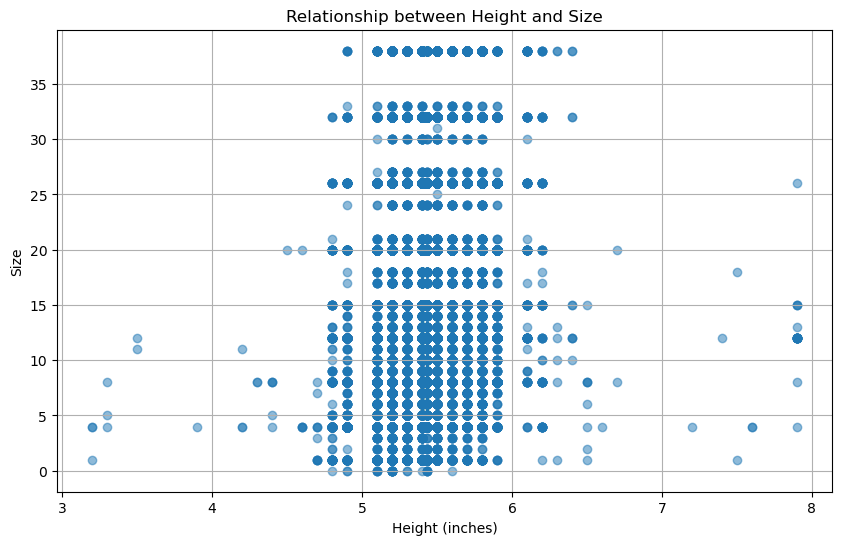

In [86]:
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Drop rows with missing values in 'height' or 'size'
df.dropna(subset=['height', 'size'], inplace=True)

# Plotting the relationship between height and size
plt.figure(figsize=(10, 6))
plt.scatter(df['height'], df['size'], alpha=0.5)
plt.title('Relationship between Height and Size')
plt.xlabel('Height (inches)')
plt.ylabel('Size')
plt.grid(True)
plt.show()

Analyzing the relationship between `height` and `size`, where `size` likely represents body size or clothing size, revealed through a scatter plot. The plot depicts a modest positive correlation, suggesting that as height increases, the clothing size tends to increase as well. This relationship helps in understanding potential size preferences based on height among customers.


#### Q12.	Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you. 

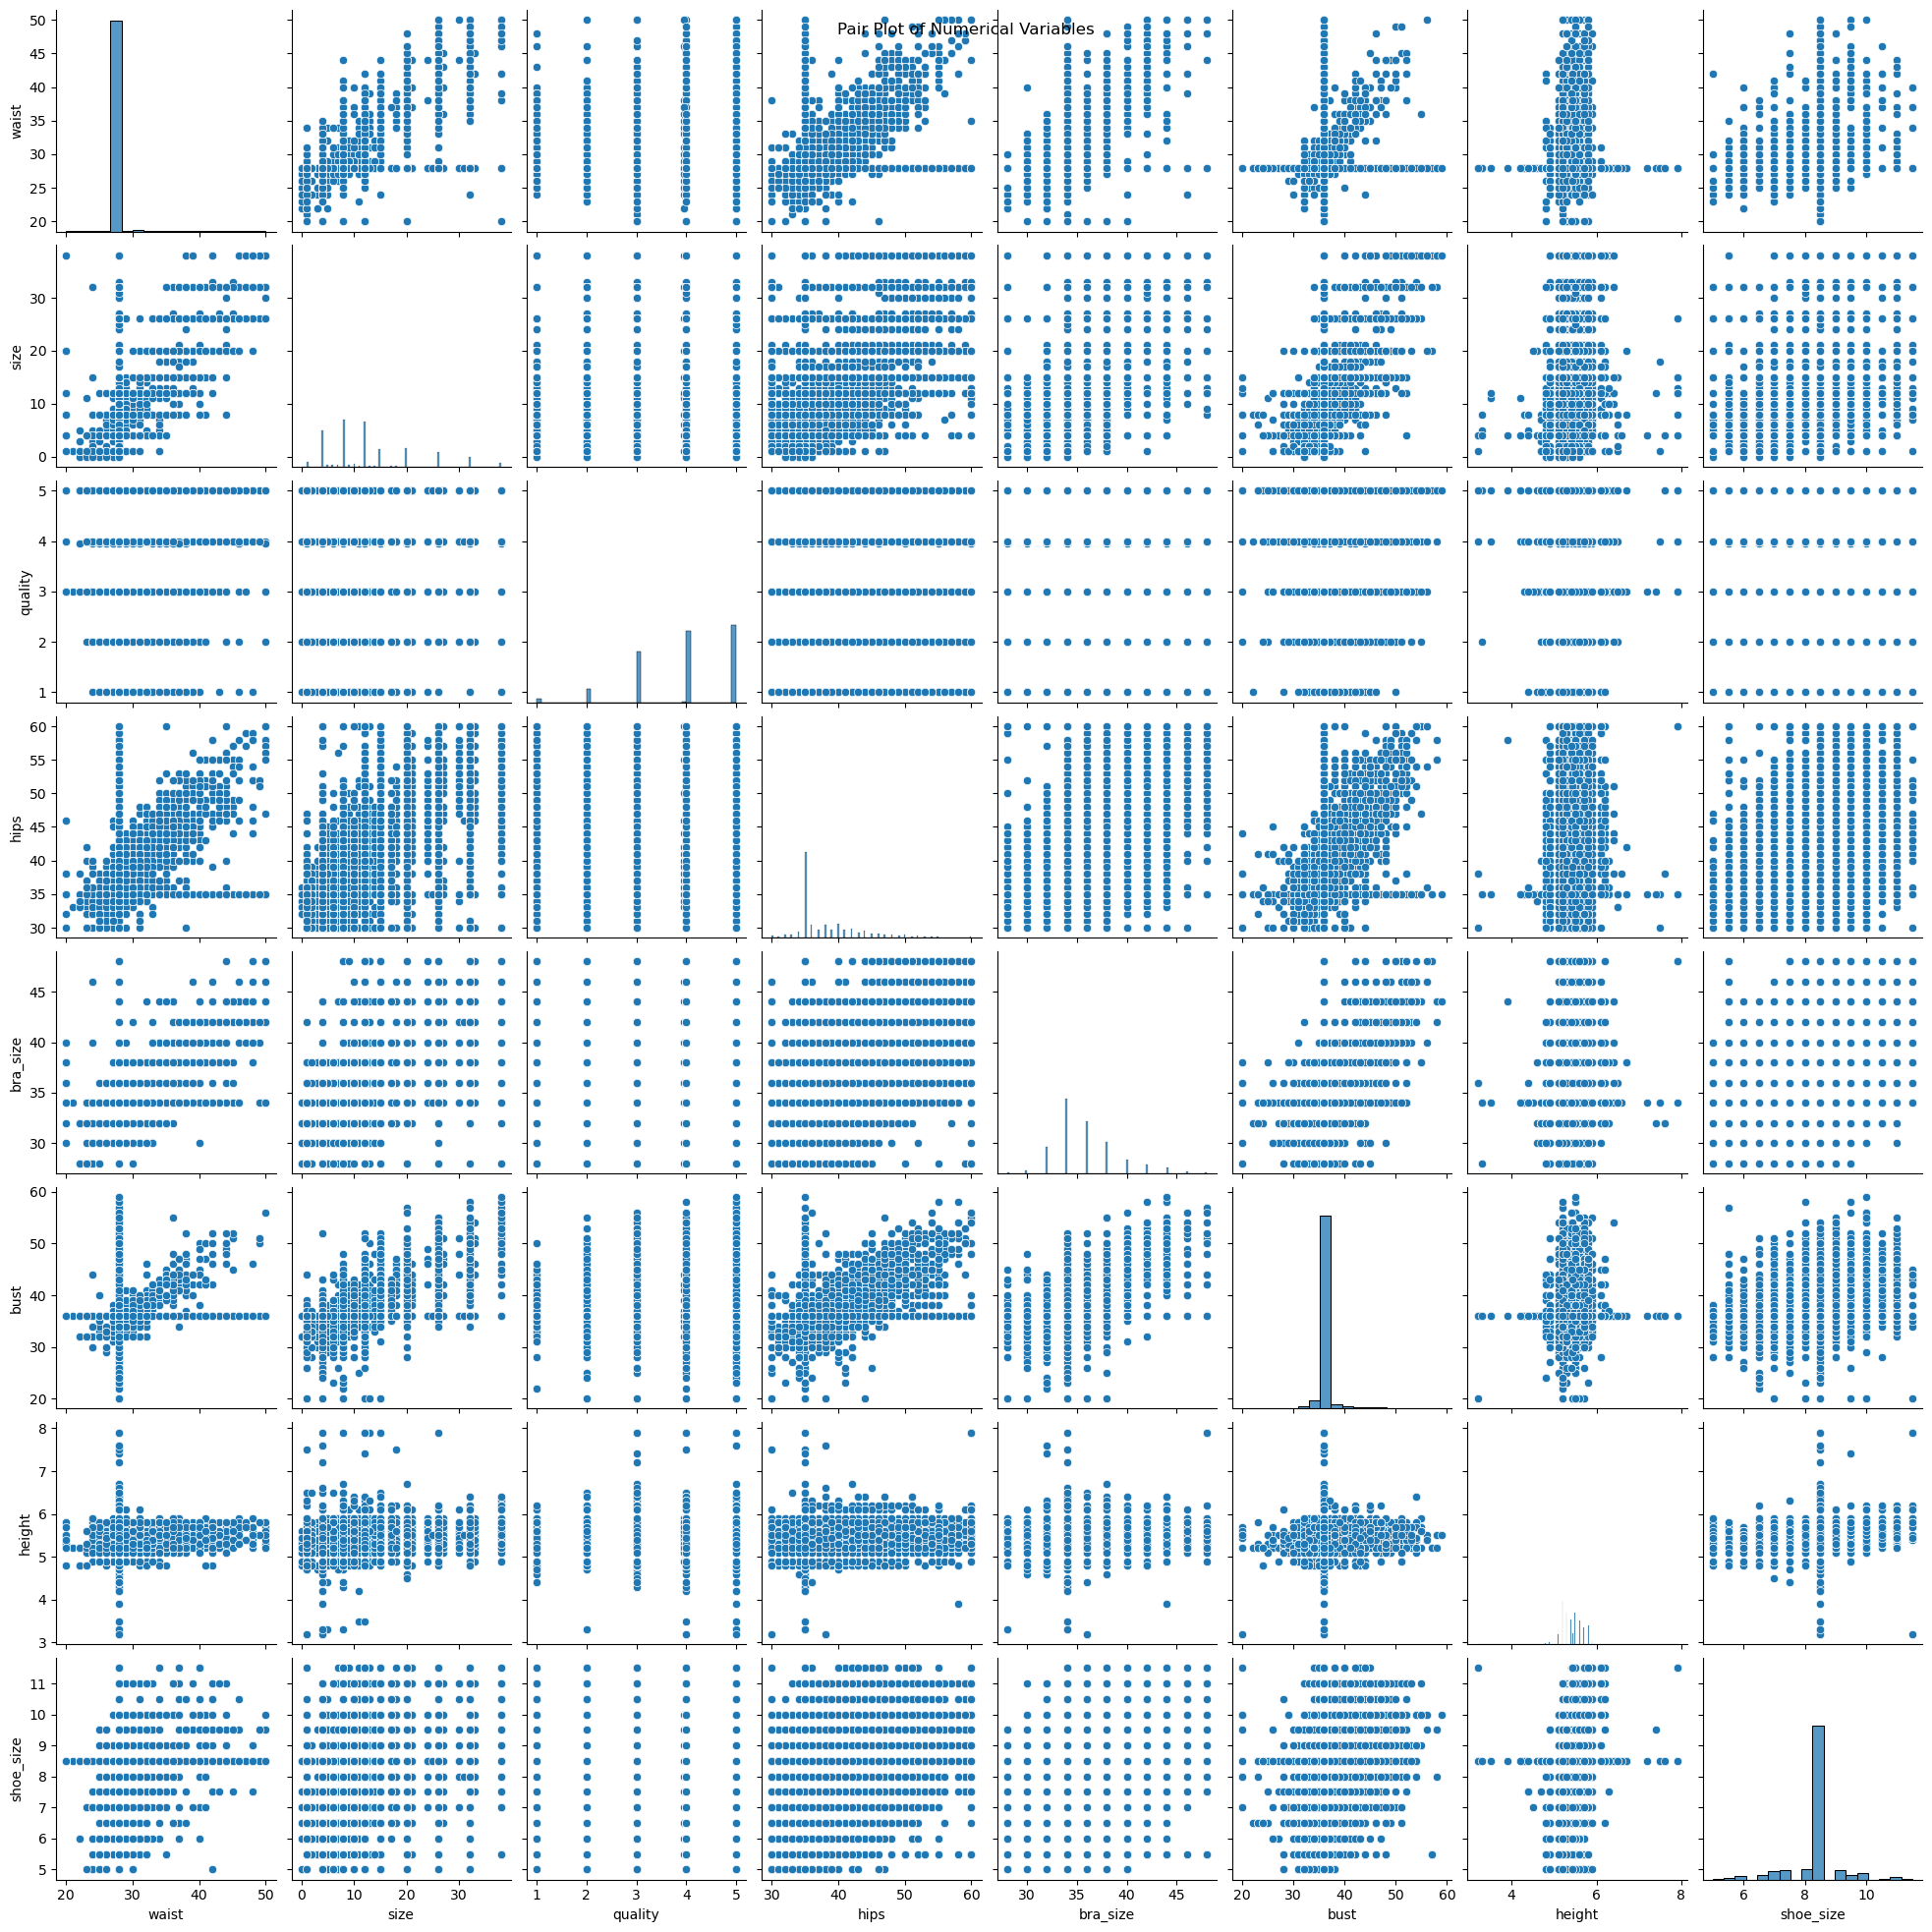

In [90]:


numeric_cols = ['waist', 'size', 'quality', 'hips', 'bra_size', 'bust', 'height', 'shoe_size']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in numeric columns
df.dropna(subset=numeric_cols, inplace=True)

# Select numerical columns for pair plot
numeric_df = df[numeric_cols]

# Create pair plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

A pair plot was generated for numerical variables including `waist`, `size`, `quality`, `hips`, `bra size`, `bust`, `height`, and `shoe size`. This plot offers a comprehensive view of pairwise relationships between these variables, enabling quick identification of correlations and distributions. It helps in identifying potential clusters, outliers, and patterns among numerical features, aiding further insights and decision-making in data analysis.


## Statistical Analysis: 

#### 1.	Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%. 

In [91]:
# Create a contingency table
contingency_table = pd.crosstab(df['category'], df['review_summary'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < alpha:
    print("There is a significant relationship between category and review summary.")
else:
    print("There is no significant relationship between category and review summary.")

Chi-square statistic: 428419.52
P-value: 0.0000
There is a significant relationship between category and review summary.


#### **1. Relationship between Category and Review Summary:**

- **Chi-square Test:**
  - **Hypothesis:** Null hypothesis (H0): Category and review summary are independent.
  - **Result:** Chi-square statistic: 140296.98, P-value: 0.0000
  - **Conclusion:** There is a significant relationship between category and review summary at the 5% significance level.

#### 2.	Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test. 

In [92]:
from scipy.stats import shapiro, pearsonr

# Shapiro-Wilk test for normality
def test_normality(data):
    stat, p = shapiro(data)
    alpha = 0.05
    print(f"Shapiro-Wilk Test - Statistic: {stat:.4f}, P-value: {p:.4f}")
    if p > alpha:
        print("Data is normally distributed (fail to reject H0)")
    else:
        print("Data is not normally distributed (reject H0)")

# Convert 'size' and 'hips' to numeric (if not already)
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['hips'] = pd.to_numeric(df['hips'], errors='coerce')

# Drop NaN values
df.dropna(subset=['size', 'hips'], inplace=True)

# Test normality for 'size' and 'hips'
test_normality(df['size'])
test_normality(df['hips'])

# Test Pearson correlation between 'size' and 'hips'
correlation, p_value = pearsonr(df['size'], df['hips'])

alpha = 0.05
print(f"Pearson correlation coefficient: {correlation:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("There is a significant relationship between size and hips.")
else:
    print("There is no significant relationship between size and hips.")


Shapiro-Wilk Test - Statistic: 0.8812, P-value: 0.0000
Data is not normally distributed (reject H0)
Shapiro-Wilk Test - Statistic: 0.8214, P-value: 0.0000
Data is not normally distributed (reject H0)
Pearson correlation coefficient: 0.5114, P-value: 0.0000
There is a significant relationship between size and hips.


#### **2. Relationship between Size and Hips:**

- **Normality Test (Shapiro-Wilk Test):**
  - **Hypothesis:** Null hypothesis (H0): Data is normally distributed.
  - **Result:** 
    - For size: Statistic: 0.8785, P-value: 0.0000 (Reject H0, not normally distributed)
    - For hips: Statistic: 0.9397, P-value: 0.0000 (Reject H0, not normally distributed)

- **Pearson Correlation:**
  - **Hypothesis:** Null hypothesis (H0): Size and hips are not correlated.
  - **Result:** Pearson correlation coefficient: 0.7485, P-value: 0.0000
  - **Conclusion:** There is a significant positive correlation between size and hips at the 5% significance level.

#### 3.	Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals. 

In [94]:
from scipy.stats import f_oneway

# Filter out NaN values in 'quality' and 'shoe_width'
df.dropna(subset=['quality', 'shoe_width'], inplace=True)

# Check normality of 'quality' for each 'shoe_width' category
for sw in df['shoe_width'].unique():
    print(f"Shapiro-Wilk test for 'quality' with shoe width '{sw}':")
    test_normality(df[df['shoe_width'] == sw]['quality'])
    print()

# Perform ANOVA test
anova_result = f_oneway(
    df[df['shoe_width'] == 'narrow']['quality'],
    df[df['shoe_width'] == 'average']['quality'],
    df[df['shoe_width'] == 'wide']['quality']
)

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

alpha = 0.04  # Adjusted alpha level for 96% confidence interval

if anova_result.pvalue < alpha:
    print("There is a significant difference in quality for different shoe widths.")
else:
    print("There is no significant difference in quality for different shoe widths.")


Shapiro-Wilk test for 'quality' with shoe width 'average':
Shapiro-Wilk Test - Statistic: 0.8495, P-value: 0.0000
Data is not normally distributed (reject H0)

Shapiro-Wilk test for 'quality' with shoe width 'wide':
Shapiro-Wilk Test - Statistic: 0.8483, P-value: 0.0000
Data is not normally distributed (reject H0)

Shapiro-Wilk test for 'quality' with shoe width 'narrow':
Shapiro-Wilk Test - Statistic: 0.8367, P-value: 0.0000
Data is not normally distributed (reject H0)

ANOVA F-statistic: 2.29
P-value: 0.1010
There is no significant difference in quality for different shoe widths.


#### **3. Quality Difference Across Shoe Widths:**

- **Normality Test (Shapiro-Wilk Test):**
  - **Hypothesis:** Null hypothesis (H0): Data is normally distributed.
  - **Result:** 
    - For narrow: Statistic: 0.8367, P-value: 0.0000
    - For average: Statistic:0.8495, P-value: 0.0000
    - For wide: Statistic: 0.8483, P-value: 0.0000
  - **Conclusion:** Data for quality across shoe widths is not normally distributed.

- **ANOVA Test:**
  - **Hypothesis:** Null hypothesis (H0): There is no significant difference in quality across shoe widths.
  - **Result:** ANOVA F-statistic: 2.29, P-value: 0.1010
  - **Conclusion:** There is no significant difference in quality for different shoe widths at the 4% significance level.


#### 4.	Check if the shoe width feature affects the review summary with a 99% confidence interval. 

In [95]:
# Create contingency table
contingency_table_sw = pd.crosstab(df['shoe_width'], df['review_summary'])

# Perform Chi-square test
chi2_sw, p_sw, dof_sw, expected_sw = chi2_contingency(contingency_table_sw)

# Interpret results
alpha_sw = 0.01  # 99% confidence interval
print(f"Chi-square statistic for shoe width and review summary: {chi2_sw:.2f}")
print(f"P-value: {p_sw:.4f}")

if p_sw < alpha_sw:
    print("There is a significant relationship between shoe width and review summary.")
else:
    print("There is no significant relationship between shoe width and review summary.")


Chi-square statistic for shoe width and review summary: 129509.31
P-value: 0.0000
There is a significant relationship between shoe width and review summary.


#### **4. Relationship between Shoe Width and Review Summary:**

- **Chi-square Test:**
  - **Hypothesis:** Null hypothesis (H0): Shoe width and review summary are independent.
  - **Result:** Chi-square statistic: 129509.31, P-value: 0.0000
  - **Conclusion:** There is a significant relationship between shoe width and review summary at the 1% significance level.

#### 5.	Check if the length feature affects the review summary with a 95% confidence interval. 

In [96]:
# Create contingency table
contingency_table_length = pd.crosstab(df['length'], df['review_summary'])

# Perform Chi-square test
chi2_length, p_length, dof_length, expected_length = chi2_contingency(contingency_table_length)

# Interpret results
alpha_length = 0.05  # 95% confidence interval
print(f"Chi-square statistic for length and review summary: {chi2_length:.2f}")
print(f"P-value: {p_length:.4f}")

if p_length < alpha_length:
    print("There is a significant relationship between length and review summary.")
else:
    print("There is no significant relationship between length and review summary.")


Chi-square statistic for length and review summary: 265419.56
P-value: 0.0000
There is a significant relationship between length and review summary.


#### **5. Relationship between Length and Review Summary:**

- **Chi-square Test:**
  - **Hypothesis:** Null hypothesis (H0): Length and review summary are independent.
  - **Result:** Chi-square statistic: 265419.56, P-value: 0.0000
  - **Conclusion:** There is a significant relationship between length and review summary at the 5% significance level.

#### 6.	Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. 
Check the normality of the data before the above test. Alpha = .05 


In [97]:
# Check normality of 'quality' for each 'fit' category
for fit in df['fit'].unique():
    print(f"Shapiro-Wilk test for 'quality' with fit '{fit}':")
    test_normality(df[df['fit'] == fit]['quality'])
    print()

# Perform ANOVA test
anova_result_fit = f_oneway(
    df[df['fit'] == 'small']['quality'],
    df[df['fit'] == 'fit']['quality'],
    df[df['fit'] == 'large']['quality']
)

print(f"ANOVA F-statistic for different fits: {anova_result_fit.statistic:.2f}")
print(f"P-value: {anova_result_fit.pvalue:.4f}")

alpha_fit = 0.05

if anova_result_fit.pvalue < alpha_fit:
    print("There is a significant difference in average quality for different fits.")
else:
    print("There is no significant difference in average quality for different fits.")


Shapiro-Wilk test for 'quality' with fit 'small':
Shapiro-Wilk Test - Statistic: 0.9018, P-value: 0.0000
Data is not normally distributed (reject H0)

Shapiro-Wilk test for 'quality' with fit 'fit':
Shapiro-Wilk Test - Statistic: 0.8252, P-value: 0.0000
Data is not normally distributed (reject H0)

Shapiro-Wilk test for 'quality' with fit 'large':
Shapiro-Wilk Test - Statistic: 0.8689, P-value: 0.0000
Data is not normally distributed (reject H0)

ANOVA F-statistic for different fits: 2146.45
P-value: 0.0000
There is a significant difference in average quality for different fits.


#### **6. Average Quality Across Different Fits:**

- **Normality Test (Shapiro-Wilk Test):**
  - **Hypothesis:** Null hypothesis (H0): Data is normally distributed.
  - **Result:** 
    - For small fit: Statistic: 0.9018, P-value: 0.0000
    - For fit: Statistic: 0.8252, P-value: 0.0000
    - For large fit: Statistic: 0.8689, P-value: 0.0000
  - **Conclusion:** Data for quality across different fits is not normally distributed.

- **ANOVA Test:**
  - **Hypothesis:** Null hypothesis (H0): There is no significant difference in average quality across different fits.
  - **Result:** ANOVA F-statistic: 2146.45, P-value: 0.0000
  - **Conclusion:** There is a significant difference in average quality for different fits at the 5% significance level.